In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [ ]:
df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


Данные не требуют обработки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df['Outcome'], test_size=0.25, random_state=42)

In [ ]:
print(f"Размеры исходного датасета: {df.shape}")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Размеры исходного датасета: (9538, 17)
x_train: (7153, 16), y_train: (7153,)
x_test: (2385, 16), y_test: (2385,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_model = knn.fit(x_train, y_train)

In [ ]:
knn_predictions = knn.predict(x_test.values)
knn_predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6737945492662474


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, knn_predictions)

array([[1480,  102],
       [ 676,  127]])

<Axes: >

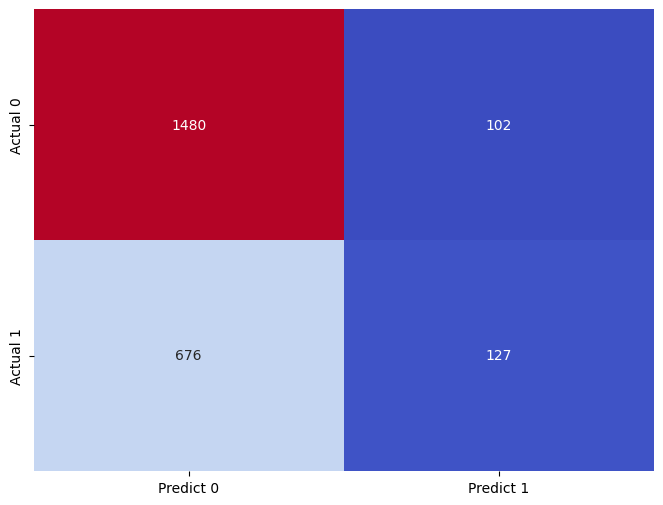

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=['Predict 0', 'Predict 1'], yticklabels=['Actual 0', 'Actual 1'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.5545851528384279
Recall: 0.1581569115815691


In [ ]:
f1 = f1_score(y_test, knn_predictions)
print(f'F1: {f1}')

F1: 0.24612403100775193


<ipython-input-26-5d2410004052>:8: RuntimeWarning: invalid value encountered in divide
  z = 2*X*Y/(X+Y)


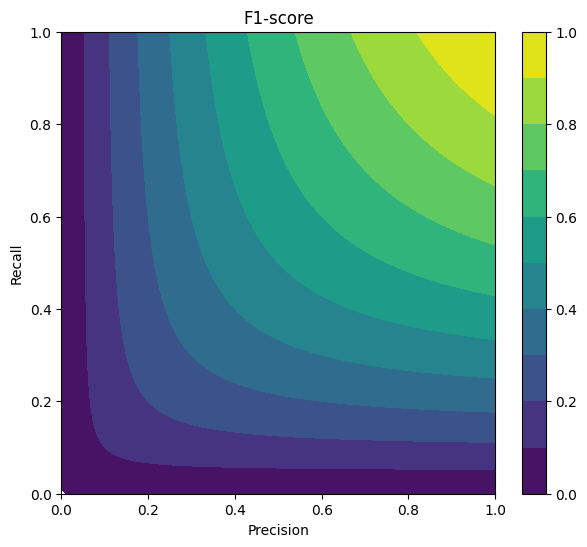

In [ ]:
import numpy as np
from matplotlib import ticker

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
z = 2*X*Y/(X+Y)

fig, ax = plt.subplots(figsize=(7,6))
cs = ax.contourf(X, Y, z, locator=ticker.LinearLocator())
cbar = fig.colorbar(cs)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-score');

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(x_train)

array([[-0.88697085,  0.4037797 ,  1.12362248, ..., -0.73169924,
        -0.02897435, -0.81954393],
       [-0.93494042,  0.80894716,  0.75502011, ...,  0.80315257,
        -0.02897435, -0.81954393],
       [ 0.02445086, -0.81172266, -0.4150388 , ...,  0.80315257,
        -0.02897435, -0.81954393],
       ...,
       [ 0.60008563,  1.61928207, -1.95370008, ...,  0.80315257,
        -0.02897435,  1.22019084],
       [ 0.98384215, -1.01430639, -0.89185471, ...,  2.33800439,
        -0.02897435,  1.22019084],
       [ 0.69602476, -0.20397148, -0.98992323, ..., -0.73169924,
        -0.02897435,  1.22019084]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

1.0

In [ ]:
from sklearn import tree

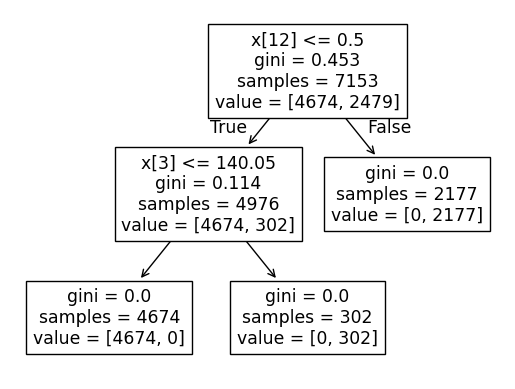

In [ ]:
tree.plot_tree(clf);